## Assignment 41 - 17 March 2023 Divya

**Q1: What are missing values in a dataset? Why is it essential to handle missing values? Name some algorithms that are not affected by missing values.**

Missing values in a dataset refer to the absence of data or information for certain variables or data points. When collecting data, missing values can occur due to various reasons, such as data entry errors, survey non-responses, or technical issues during data collection.

### The Types of Missing Data Are:

**1.Missing Completely at Random(MCAR)**:
Missing completely at random (MCAR) is a type of missing data mechanism in which the probability of a value being missing is unrelated to both the observed data and the missing data. In other words, if the data is MCAR, the missing values are randomly distributed throughout the dataset, and there is no systematic reason for why they are missing.

For example, in a survey about the prevalence of a certain disease, the missing data might be MCAR if the survey participants with missing values for certain questions were selected randomly and their missing responses are not related to their disease status or any other variables measured in the survey.

**2. Missing at Random (MAR)**:
Missing at Random (MAR) is a type of missing data mechanism in which the probability of a value being missing depends only on the observed data, but not on the missing data itself. In other words, if the data is MAR, the missing values are systematically related to the observed data, but not to the missing data. Here are a few examples of missing at random:

Income data: Suppose you are collecting income data from a group of people, but some participants choose not to report their income. If the decision to report or not report income is related to the participant's age or gender, but not to their income level, then the data is missing at random.

Medical data: Suppose you are collecting medical data on patients, including their blood pressure, but some patients do not report their blood pressure. If the patients who do not report their blood pressure are more likely to be younger or have healthier lifestyles, but the missingness is not related to their actual blood pressure values, then the data is missing at random.

**3. Missing data not at random (MNAR)**: 
It is a type of missing data mechanism where the probability of missing values depends on the value of the missing data itself. In other words, if the data is MNAR, the missingness is not random and is dependent on unobserved or unmeasured factors that are associated with the missing values.

For example, suppose you are collecting data on the income and job satisfaction of employees in a company. If employees who are less satisfied with their jobs are more likely to refuse to report their income, then the data is not missing at random. In this case, the missingness is dependent on Missing data not at random (MNAR)
It is a type of missing data mechanism where the probability of missing values depends on the value of the missing data itself. In other words, if the data is MNAR, the missingness is not random and is dependent on unobserved or unmeasured factors that are associated with the missing values.

For example, suppose you are collecting data on the income and job satisfaction of employees in a company. If employees who are less satisfied with their jobs are more likely to refuse to report their income, then the data is not missing at random. In this case, the missingness is dependent on job satisfaction, which is not directly observed or measured.


### Handling missing values is essential for several reasons:

**Data Quality**: Missing values can lead to biased or inaccurate analysis, affecting the quality and reliability of the results.

**Model Performance**: Many machine learning algorithms cannot handle missing values directly, leading to errors or biased model performance if not properly dealt with.

**Statistical Analysis**: Missing values can distort statistical analysis, leading to incorrect conclusions and interpretations.


### Some common methods for handling missing values include:

**Dropping Rows**: Removing rows with missing values can be done when the amount of missing data is relatively small and doesn't significantly impact the overall dataset.

**Mean/Median/Mode Imputation**: Filling missing values with the mean, median, or mode of the corresponding feature can be a simple way to impute missing data.

**Interpolation**: Interpolating missing values based on surrounding values or time series patterns.

**Advanced Imputation Methods**: Techniques like Multiple Imputation, K-nearest neighbors imputation, or matrix factorization can be used for more advanced imputation of missing data.



### Algorithms Not Affected by Missing Values:
Some machine learning algorithms are not directly affected by missing values and can handle them effectively:

**Decision Trees**: Decision trees can handle missing values by considering alternate paths when encountering missing values during the tree construction process.

**Random Forest**: As an ensemble of decision trees, Random Forest can naturally handle missing values by averaging predictions from multiple trees.

**k-Nearest Neighbors (k-NN)**: k-NN imputation can be used to fill missing values by considering the k nearest neighbors of the data point with missing values.

**Gradient Boosting Machines (GBM)**: Similar to decision trees, GBM can handle missing values naturally during the boosting process.

**Q2: List down techniques used to handle missing data. Give an example of each with python code.**

### Dropping Rows / Columns

In [1]:
import seaborn as sns
df = sns.load_dataset("titanic")
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [2]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [3]:
df.shape

(891, 15)

In [4]:
df.dropna().shape

(182, 15)

Here there is a heaby loss of data if we drop rows the number of rows reduced from 891 to 182 there is a significant loss of data here so this data is not feasable

In [5]:
#dropping by coloumns if you want to make it permanent change make sure to put inplace = True
df.dropna(axis = 1).shape

(891, 11)

### Mean / Median / Mode Imputation

#### Mean Imputation(if no outlier present)

In [6]:
#Mean Imputation Creating a new coloumn age_filled with filled mean
df['age_filled_mean'] = df['age'].fillna(df['age'].mean())
df[['age_filled_mean','age']]
#We observe that the null values have been filled with mean values

,age_filled_mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


In [7]:
df['age'].isnull().sum()

177

In [8]:
df['age_filled_mean'].isnull().sum()

0

Here we observe that 177 null values have been filled with means of the value

#### Median Imputation(If outliers are present)

In [9]:
df['age_filled_median'] = df['age'].fillna(df['age'].median())
df[['age_filled_median','age']]

,age_filled_median,age
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0
...,...,...
886,27.0,27.0
887,19.0,19.0
888,28.0,NaN
889,26.0,26.0


In [10]:
#here also we see there all the missing values are filled
df['age_filled_median'].isnull().sum()

0

#### Mode Imputation(Categorical Values)

In [11]:
df.isnull().sum()

survived               0
pclass                 0
sex                    0
age                  177
sibsp                  0
parch                  0
fare                   0
embarked               2
class                  0
who                    0
adult_male             0
deck                 688
embark_town            2
alive                  0
alone                  0
age_filled_mean        0
age_filled_median      0
dtype: int64

In [12]:
df.dtypes

survived                int64
pclass                  int64
sex                    object
age                   float64
sibsp                   int64
parch                   int64
fare                  float64
embarked               object
class                category
who                    object
adult_male               bool
deck                 category
embark_town            object
alive                  object
alone                    bool
age_filled_mean       float64
age_filled_median     float64
dtype: object

In [13]:
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_filled_mean,age_filled_median
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.0,22.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.0,38.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.0,26.0


In [14]:
#So we will fill the missing values of the embarked and embark_town coloumn since they are categorial
df['embarked'].isnull().sum()

2

In [15]:
df['embark_town'].isnull().sum()

2

In [16]:
value_1 = df[df['embarked'].notna()]['embarked'].mode()[0]
value_2 = df[df['embark_town'].notna()]['embark_town'].mode()[0]

value_1 , value_2

('S', 'Southampton')

In [17]:
df['emarked_bymode'] = df['embarked'].fillna(value_1)
df['emark_town_bymode'] = df['embark_town'].fillna(value_2)

In [18]:
df.isnull().sum()

survived               0
pclass                 0
sex                    0
age                  177
sibsp                  0
parch                  0
fare                   0
embarked               2
class                  0
who                    0
adult_male             0
deck                 688
embark_town            2
alive                  0
alone                  0
age_filled_mean        0
age_filled_median      0
emarked_bymode         0
emark_town_bymode      0
dtype: int64

In [19]:
df_new = df.drop(['age','embarked','deck','embark_town'],axis=1)
df_new.isnull().sum()

survived             0
pclass               0
sex                  0
sibsp                0
parch                0
fare                 0
class                0
who                  0
adult_male           0
alive                0
alone                0
age_filled_mean      0
age_filled_median    0
emarked_bymode       0
emark_town_bymode    0
dtype: int64

**Q3: Explain the imbalanced data. What will happen if imbalanced data is not handled?**

Imbalanced data refers to a situation in a classification problem where the distribution of classes is not equal, resulting in one or more classes having significantly fewer samples compared to the others ie. there is an unequal proportion of data points among the different classes.

For example, consider a binary classification problem to detect fraudulent transactions. If only a tiny fraction of transactions are fraudulent, and the vast majority are non-fraudulent, the dataset is imbalanced.


#### If imbalanced data is not handled properly, several issues may arise:

**Biased Model**: When the data is imbalanced, the model can become biased towards the majority class. The classifier may perform well on the majority class but poorly on the minority class. The model may classify almost all examples as the majority class, leading to low sensitivity or recall for the minority class.

**Misleading Accuracy**: Accuracy is not an appropriate metric to evaluate model performance on imbalanced data. A model that predicts the majority class for all instances may have high accuracy due to the large number of majority class samples but fail to detect the minority class.

**False Positives and Negatives**: A biased model may produce a large number of false positives or false negatives for the minority class. For example, in medical diagnosis, a model may falsely predict that a rare disease is not present in most cases.

**Reduced Generalization**: The model's performance on new, unseen data may suffer due to its inability to generalize well across imbalanced classes. It may struggle to make accurate predictions on real-world scenarios.

#### To address imbalanced data, various techniques can be employed:

**Resampling**: It involves either oversampling the minority class to create more instances or undersampling the majority class to reduce its dominance. Both techniques aim to balance the class distribution.

**Synthetic Data Generation**: Techniques like SMOTE (Synthetic Minority Over-sampling Technique) can be used to generate synthetic samples for the minority class.

**Cost-Sensitive Learning**: Assigning different misclassification costs to different classes during model training to encourage the model to focus on correctly classifying the minority class.

**Ensemble Methods**: Ensemble techniques like Random Forest or Gradient Boosting are often robust to imbalanced data and can improve model performance.

**Anomaly Detection Techniques**: In cases where the minority class represents anomalies or rare events, anomaly detection methods can be used to handle imbalanced data effectively.

**Q4: What are Up-sampling and Down-sampling? Explain with an example when up-sampling and down- sampling are required.**

**Upsampling**: Upsampling involves increasing the number of instances in the minority class to balance the class distribution. This is typically achieved by replicating existing instances of the minority class or by generating synthetic samples using techniques like SMOTE (Synthetic Minority Over-sampling Technique).

**Downsampling**: Downsampling involves reducing the number of instances in the majority class to balance the class distribution. This is typically achieved by randomly removing instances from the majority class.

In [20]:
from sklearn.datasets import make_classification

X,y = make_classification(n_samples=1000,
                          n_redundant=0,
                         n_features=2,
                         n_clusters_per_class=1,
                         weights=[0.80],
                         random_state=12)

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

df1 =pd.DataFrame(X,columns=['f1','f2'])
df2 =pd.DataFrame(y,columns=['t'])

df = pd.concat([df1,df2],axis = 1)

In [22]:
df.head()

,f1,f2,t
0,-1.267359,0.779033,1
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [23]:
df['t'].value_counts()

t
0    800
1    200
Name: count, dtype: int64

In [24]:
## By upsampling

majority_class = df[df['t'] == 0]
minority_class = df[df['t'] == 1]

In [25]:
majority_class.shape , minority_class.shape

((800, 3), (200, 3))

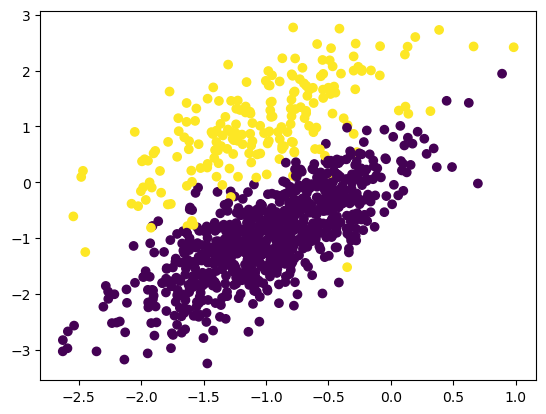

In [26]:
plt.scatter(df['f1'],df['f2'],c=df['t'])

In [27]:
from sklearn.utils import resample

df_minority_unsampled = resample(minority_class,
                                replace = True,
                                n_samples=len(majority_class),
                                random_state=340)

In [28]:
df_minority_unsampled.shape

(800, 3)

In [29]:
df = pd.concat([majority_class,df_minority_unsampled]).reset_index(drop=True)

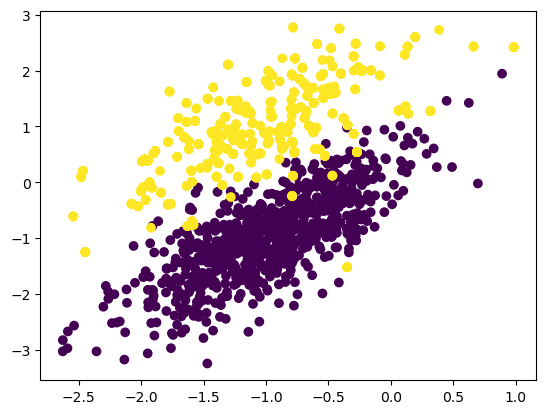

In [30]:
plt.scatter(df['f1'],df['f2'],c=df['t'])

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification


X,y = make_classification(n_samples=1000,
                          n_redundant=0,
                         n_features=2,
                         n_clusters_per_class=1,
                         weights=[0.80],
                         random_state=229)


df1 =pd.DataFrame(X,columns=['f1','f2'])
df2 =pd.DataFrame(y,columns=['t'])

df = pd.concat([df1,df2],axis = 1)

df.head()

,f1,f2,t
0,-1.530120,-0.939897,1
1,-1.555676,0.741501,0
2,-2.106253,-0.772606,1
3,-2.040782,2.049532,0
4,-0.196920,0.063501,0


In [32]:
df['t'].value_counts()

t
0    800
1    200
Name: count, dtype: int64

In [33]:
majority_class = df[df['t'] == 0]
minority_class = df[df['t'] == 1]

majority_class.shape , minority_class.shape

((800, 3), (200, 3))

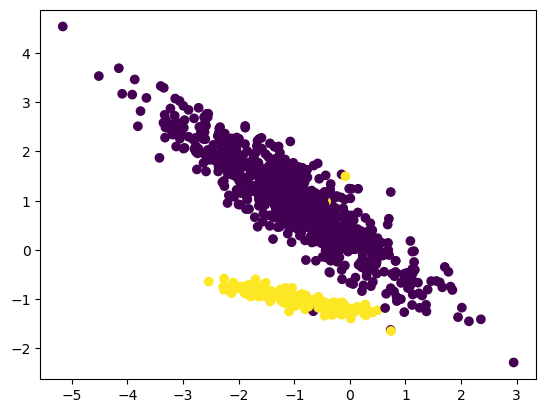

In [34]:
plt.scatter(df['f1'],df['f2'],c=df['t'])

In [35]:
from sklearn.utils import resample

df_majority_unsampled = resample(majority_class,
                                replace = False,
                                n_samples=len(minority_class),
                                random_state=340)

In [36]:
df_majority_unsampled.shape , minority_class.shape

((200, 3), (200, 3))

In [37]:
df = pd.concat([df_majority_unsampled,minority_class],axis = 0).reset_index(drop=True)

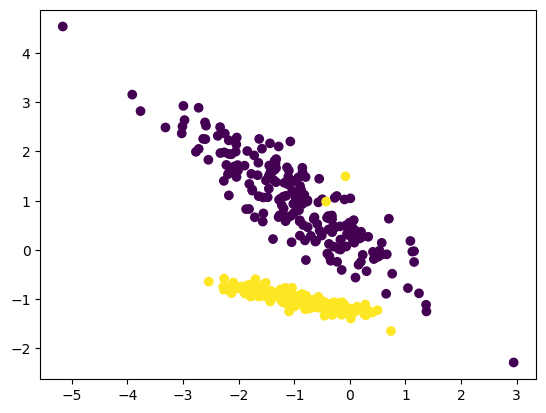

In [38]:
plt.scatter(df['f1'],df['f2'],c=df['t'])

**Q5: What is data Augmentation? Explain SMOTE.**

Data augmentation is a technique used to artificially increase the size and diversity of a dataset by creating new variations of the existing data. In various machine learning tasks, especially in computer vision and natural language processing, data augmentation is employed to improve model generalization and robustness. By introducing variations in the data, the model becomes more capable of handling different scenarios and variations that may be encountered in real-world applications.

SMOTE (Synthetic Minority Over-sampling Technique) is a specific data augmentation technique designed to address imbalanced datasets in classification problems, where one class has significantly fewer instances than the other class(es). SMOTE creates synthetic samples for the minority class by interpolating between existing minority class instances.

How SMOTE works:

For each minority class sample, SMOTE selects k nearest neighbors from the same class based on some distance metric (e.g., Euclidean distance) in the feature space.

A random neighbor is selected among the k nearest neighbors, and a synthetic sample is generated by linearly interpolating between the selected minority class sample and the random neighbor. The amount of interpolation is controlled by a random value between 0 and 1.

The process is repeated until the desired number of synthetic samples is generated to balance the class distribution or reach a specific level of desired balance.

In [39]:
from sklearn.datasets import make_classification

X,y = make_classification(n_samples=1000,
                          n_redundant=0,
                         n_features=2,
                         n_clusters_per_class=1,
                         weights=[0.80],
                         random_state=12)

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

df1 =pd.DataFrame(X,columns=['f1','f2'])
df2 =pd.DataFrame(y,columns=['t'])

df = pd.concat([df1,df2],axis = 1).reset_index(drop=True)

In [41]:
df.head()

,f1,f2,t
0,-1.267359,0.779033,1
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [42]:
df['t'].value_counts()

t
0    800
1    200
Name: count, dtype: int64

In [43]:
majority_class = df[df['t'] == 0]
minority_class = df[df['t'] == 1]

majority_class.shape , minority_class.shape

((800, 3), (200, 3))

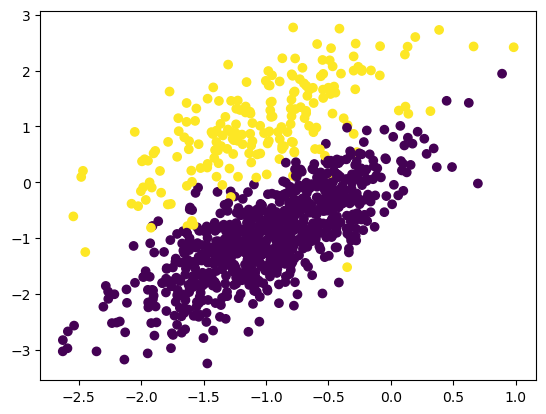

In [44]:
plt.scatter(df['f1'],df['f2'],c = df['t'])

In [45]:
!pip install imblearn

In [46]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()

X,y = oversample.fit_resample(df[['f1','f2']],df['t'])

In [47]:
X.shape , y.shape

((1600, 2), (1600,))

In [48]:
len(y[y==0]) , len(y[y==1]) 

(800, 800)

In [49]:
df1 =pd.DataFrame(X,columns=['f1','f2'])
df2 =pd.DataFrame(y,columns=['t'])

over_sampled_df = pd.concat([df1,df2],axis = 1)

In [50]:
over_sampled_df['t'].value_counts()

t
1    800
0    800
Name: count, dtype: int64

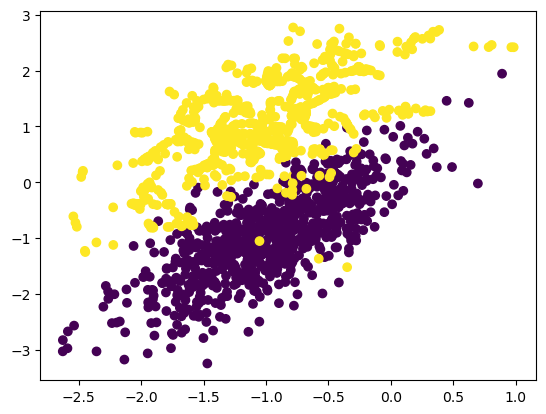

In [51]:
plt.scatter(over_sampled_df['f1'],over_sampled_df['f2'],c=over_sampled_df['t'])

**Q6: What are outliers in a dataset? Why is it essential to handle outliers?**

Outliers in a dataset are data points that significantly deviate from the rest of the data points. They are observations that lie at an abnormal distance from other data points, often distant from the central tendency (mean or median) of the data. Outliers can be extreme values that are much larger or much smaller than the majority of the data points in a particular feature or attribute.


Handling outliers is essential for several reasons:

**Data Quality and Accuracy**: Outliers can be the result of data entry errors, measurement errors, or anomalies in the data collection process. Dealing with outliers ensures data quality and accuracy, leading to more reliable analysis and modeling.

**Impact on Statistical Analysis**: Outliers can significantly skew statistical analysis and metrics such as mean, standard deviation, and correlation coefficients. Removing or properly handling outliers ensures that these statistics accurately represent the underlying data distribution.

**Model Performance**: Outliers can have a disproportionate impact on the model's training process. They can distort the learning algorithm's decision boundaries, leading to poor model performance and predictions. Handling outliers can help build more robust and accurate machine learning models.

**Assumptions of Models**: Some machine learning algorithms, such as linear regression, assume that the data follows a normal distribution without significant outliers. Outliers violating these assumptions can lead to biased estimates and incorrect model outputs.

**Interpretability and Generalization**: Outliers can cause models to overfit to noise and specific instances in the data, reducing their ability to generalize to new, unseen data. Handling outliers ensures better model interpretability and generalization.


Generally the approach used to find outliers is by the boxplot graph

**Q7: You are working on a project that requires analyzing customer data. However, you notice that some of the data is missing. What are some techniques you can use to handle the missing data in your analysis?**

The are several techniques that can be used to handle missing data:

#### Deletion:
**Listwise Deletion**: Removing entire rows with missing values. It is straightforward but may lead to loss of valuable information if the amount of missing data is significant.
<br>**Pairwise Deletion**: Analyzing available data for each pair of variables independently. This method utilizes all available data but may introduce bias in the analysis.

#### Imputation:
**Mean/Median/Mode Imputation**: Replacing missing values with the mean, median, or mode of the corresponding feature. It is a simple approach but may not be suitable if data follows a skewed distribution.
<br>**Regression Imputation**: Using regression models to predict missing values based on other correlated variables.
<br>**K-Nearest Neighbors (KNN) Imputation**: Imputing missing values based on the values of the k-nearest neighbors in the feature space.
<br>**Multiple Imputation**: Creating multiple imputed datasets to account for uncertainty in the imputation process. This method is particularly useful when the data is missing at random (MAR).

#### Forward or Backward Fill:
For time series data, missing values can be filled by propagating the last observed value forward or the next observed value backward.

#### Interpolation*:
Interpolating missing values based on a linear or polynomial relationship between neighboring data points.
Using Algorithms Tolerant to Missing Data:

Some machine learning algorithms can naturally handle missing data, such as decision trees or random forests.

#### Data Augmentation:
For certain types of data, data augmentation techniques can be used to generate synthetic data points for missing values.

#### Domain Expertise and Business Rules:
In some cases, domain knowledge and business rules can guide the handling of missing data. For example, setting missing values to a specific category or default value based on business rules.

**Q8: You are working with a large dataset and find that a small percentage of the data is missing. What are some strategies you can use to determine if the missing data is missing at random or if there is a pattern to the missing data?**

Different strategies can be employed to investigate the patterns of missing data:

**1. Data Visualization**:

Plotting the distribution of missing values across different features can reveal patterns. You can use heatmaps or bar plots to visualize the missingness for each feature.
Scatter plots or other visualizations can be helpful in identifying potential relationships between missing values and other variables.

**2. Descriptive Statistics**:

Computing summary statistics like mean, median, or standard deviation for features with and without missing values can provide insights into potential patterns.

**3. Correlation Analysis**:

Analyzing the correlation between missingness in one variable and other variables in the dataset may reveal potential relationships. Correlation matrices can be used for this purpose.

**4. Hypothesis Testing**:

Performing statistical tests to assess if the missingness in a particular variable is related to other variables in the dataset. Chi-square tests or t-tests can be used for this purpose.

**5. Imputation and Sensitivity Analysis**:

Impute the missing data using different methods (e.g., mean imputation, regression imputation, multiple imputation) and assess the impact of different imputation strategies on the results. If the results are robust to different imputation methods, the missing data might be MCAR or MAR.

**6. Investigate Data Collection Process**:

Understanding how the data was collected and identifying any potential biases or issues in the data collection process can help identify the reasons behind missing data.

**7. Machine Learning Models**:

Train a machine learning model to predict the presence or absence of missing values in a particular variable based on other variables. The model can give insights into potential relationships and patterns in the missing data.

**8. Pattern Analysis**:

Investigate if certain subsets of data have higher or lower missingness than others. For example, missingness might be more prevalent in certain geographical regions or for specific customer segments.

**Q9: Suppose you are working on a medical diagnosis project and find that the majority of patients in the dataset do not have the condition of interest, while a small percentage do. What are some strategies you can use to evaluate the performance of your machine learning model on this imbalanced dataset?**

When dealing with imbalanced datasets in a medical diagnosis project, it is crucial to adopt appropriate evaluation strategies to assess the performance of the machine learning model accurately. 

The strategies to evaluate the model effectively:

**Confusion Matrix**: Use a confusion matrix to analyze the model's predictions. It provides a detailed breakdown of true positives, true negatives, false positives, and false negatives.

**Accuracy with Caution**: Be cautious when relying solely on accuracy as an evaluation metric, especially for imbalanced datasets. Accuracy might be misleading, as it can be dominated by the majority class, leading to high accuracy but poor performance on the minority class.

**Precision, Recall, and F1-score**: Precision (positive predictive value) and recall (sensitivity) are valuable metrics for imbalanced datasets. Precision measures the proportion of true positives among predicted positives, while recall measures the proportion of true positives among actual positives. The F1-score is the harmonic mean of precision and recall, providing a balanced metric that considers both false positives and false negatives.

**Receiver Operating Characteristic (ROC) Curve**: Plot the ROC curve to assess the model's performance across different thresholds. The area under the ROC curve (AUC-ROC) is a valuable metric for imbalanced datasets, providing an aggregate measure of the model's discrimination power.

**Precision-Recall (PR) Curve**: Use the PR curve when the positive class is of greater interest. It visualizes the trade-off between precision and recall across different probability thresholds.

**Cost-Sensitive Learning**: Incorporate class weights or misclassification costs to give more importance to the minority class during training.

**Cross-Validation**: Utilize techniques like stratified k-fold cross-validation to ensure that each fold maintains the original class distribution. This helps in obtaining more robust and unbiased performance estimates.

**Resampling Methods**: Evaluate the model's performance using resampling techniques like oversampling, undersampling, or SMOTE to balance the class distribution during cross-validation.

**Ensemble Methods**: Consider using ensemble methods like Random Forest or Gradient Boosting, which can handle imbalanced datasets better than single models.

**Threshold Adjustment**: In certain cases, adjust the classification threshold based on the desired trade-off between precision and recall to optimize the model's performance for the specific application.

**Domain Expertise**: Involve domain experts to interpret the model's performance and validate the clinical significance of the results.

**Q10: When attempting to estimate customer satisfaction for a project, you discover that the dataset is unbalanced, with the bulk of customers reporting being satisfied. What methods can you employ to balance the dataset and down-sample the majority class?**

To balance the dataset and down-sample the majority class when attempting to estimate customer satisfaction, you can employ various techniques. 


Down-sampling involves reducing the number of instances in the majority class to match the number of instances in the minority class some methods to achieve this are :

**Random Under-Sampling**: Randomly select a subset of instances from the majority class to match the number of instances in the minority class. This approach is simple but may lead to loss of valuable information.

**Cluster-Based Under-Sampling**: Divide the majority class into clusters using clustering algorithms and then select a representative subset of instances from each cluster to maintain diversity.

**Tomek Links**: Identify pairs of instances, one from the majority class and one from the minority class, that are the nearest neighbors of each other. Remove the majority class instance of each pair.

**Edited Nearest Neighbors**: Remove majority class instances that are misclassified by their k-nearest neighbors from the minority class.

**NearMiss**: Select majority class instances that are closest to minority class instances based on distance metrics.

**Instance Hardness Threshold**: Calculate instance hardness scores for each data point based on the classifier's confidence. Select instances with lower hardness scores from the majority class.

**Ensemble Methods**: Use ensemble techniques like EasyEnsemble or BalanceCascade, which create multiple balanced datasets by combining several random subsets of the majority class.

**Q11: You discover that the dataset is unbalanced with a low percentage of occurrences while working on a project that requires you to estimate the occurrence of a rare event. What methods can you employ to balance the dataset and up-sample the minority class?**

When dealing with an imbalanced dataset with a low percentage of occurrences of a rare event, you can employ various techniques to balance the dataset and up-sample the minority class.


Up-sampling involves increasing the number of instances in the minority class to match the number of instances in the majority class some methods to achieve upsampling are:

**Random Over-Sampling**: Randomly duplicate instances from the minority class to increase its size. This approach is simple but may lead to overfitting and an overestimation of the rare event occurrence.

**SMOTE (Synthetic Minority Over-sampling Technique)**: Generate synthetic samples for the minority class by interpolating between existing instances. SMOTE selects a random neighbor for each minority class instance and creates synthetic instances along the line connecting the two instances in the feature space.

**ADASYN (Adaptive Synthetic Sampling)**: Similar to SMOTE, ADASYN generates synthetic samples for the minority class, but it assigns different weights to different minority class instances based on their difficulty in learning.

**SMOTE-ENN (SMOTE with Edited Nearest Neighbors)**: Combine SMOTE and Edited Nearest Neighbors. SMOTE is used to generate synthetic samples, and Edited Nearest Neighbors is then applied to remove noisy samples from the newly generated minority class instances.

**Borderline-SMOTE**: Focus on the borderline instances of the minority class, which are close to the decision boundary, and generate synthetic samples for them.

**Cluster-Based Over-Sampling**: Cluster the minority class instances and then generate synthetic samples for each cluster to maintain diversity.

**MSMOTE (Modified Synthetic Minority Over-sampling Technique)**: Modify SMOTE to balance the class distribution by considering both the minority and majority class.

**ADOMS (Adaptive One-Step SMOTE)**: An improved version of SMOTE that adjusts the synthetic samples' location based on the density of the feature space.

While using up-sampling techniques we must be careful, as they may lead to overfitting and noise in the data. The goal is to balance the dataset without introducing bias and to maintain the diversity and representativeness of the minority class.

After up-sampling the minority class, you will have a more balanced dataset, which can be used for estimating the occurrence of the rare event more accurately. Always evaluate the model's performance on the up-sampled dataset using appropriate evaluation metrics for imbalanced data, such as precision, recall, F1-score, and area under the ROC curve (AUC-ROC). Additionally, cross-validation should be performed to ensure robustness in the evaluation process.